### Test estimates of Mr and FeH by comparing them to another set, either true or a different method

In [1]:
%matplotlib inline
import sys
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from scipy import optimize
from scipy.stats import gaussian_kde
# from scipy import interpolate 
from scipy.interpolate import griddata
from astropy.table import join
from astroML.stats import binned_statistic_2d

In [131]:
## automatically reload any modules read below that might have changed (e.g. plots)
%reload_ext autoreload
%autoreload 2
# importing plotting and locus tools: 
sys.path.append('../src')
import LocusTools as lt
import BayesTools as bt
import PlotTools as pt

## Bayes performance

READING FROM ../data/simCatalog_three_pix_triout_chiTest4.txt
814450 read from ../data/simCatalog_three_pix_triout_chiTest4.txt
from 814450  selected 814450
814450 read from ../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates.txt
after chi2min< 10 selection: 814450 796099
calling qpB Mr
plots for dMr
made plot: ../plots/qpB_Mr.png


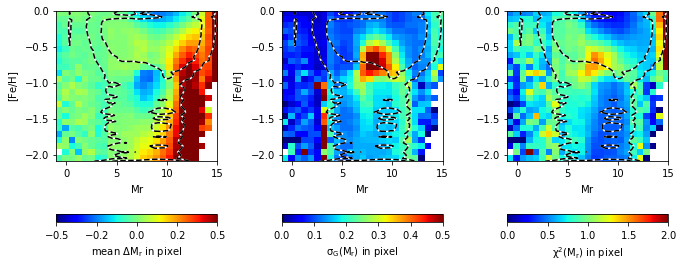

calling qpB FeH
plots for dFeH
made plot: ../plots/qpB_FeH.png


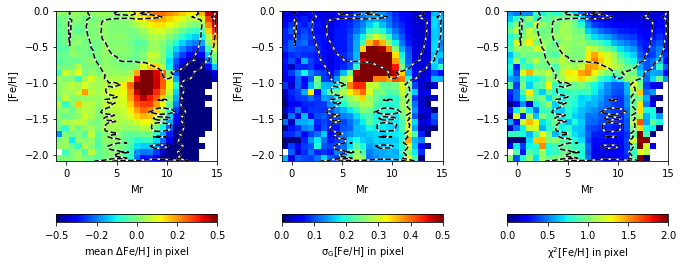

READING FROM ../data/simCatalog_three_pix_triout_chiTest4.txt
814450 read from ../data/simCatalog_three_pix_triout_chiTest4.txt
from 814450  selected 814450
814450 read from ../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates.txt
after chi2min< 10 selection: 814450 796099
calling qpB Mr
plots for dMr
made plot: ../plots/qpB_Mr.png


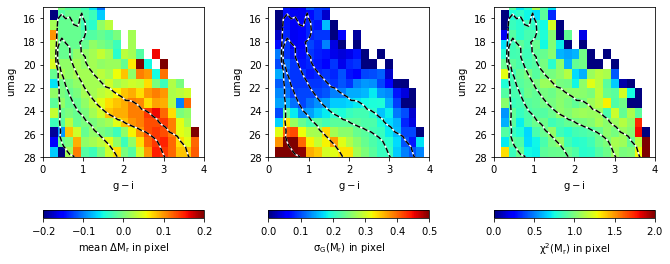

calling qpB FeH
plots for dFeH
made plot: ../plots/qpB_FeH.png


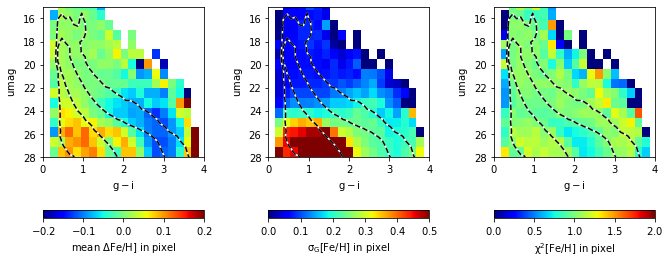

READING FROM ../data/simCatalog_three_pix_triout_chiTest4.txt
814450 read from ../data/simCatalog_three_pix_triout_chiTest4.txt
from 814450  selected 814450
814450 read from ../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates.txt
after chi2min< 10 selection: 814450 796099
calling qpBcmd
made plot: ../plots/qpBcmd.png


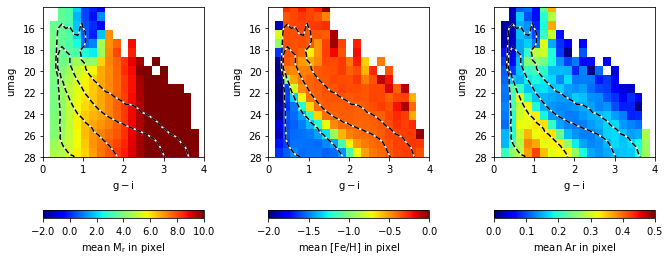

In [170]:
infile1 = '../data/simCatalog_three_pix_triout_chiTest4.txt'
infile2 = '../data/simCatalog_three_pix_triout_chiTest4_BayesEstimates.txt'
chi2max=10
umagMax=40

# performance (mean, sig, chi2) in FeH vs. Mr diagrams
s1, s2 = checkBayes(infile1, infile2, chi2max, umagMax, chiTest=True, cmd=False, fitQ=False)
!cp '../plots/qpB_Mr.png' '../plots/qpB_chiTest4_Mr.png' 
!cp '../plots/qpB_FeH.png' '../plots/qpB_chiTest4_FeH.png' 
   
# performance (mean, sig, chi2) in umag vs. g-i diagrams
s1, s2 = checkBayes(infile1, infile2, chi2max, umagMax, chiTest=True, cmd=True, fitQ=False)
!cp '../plots/qpB_Mr.png' '../plots/qpBcmd_chiTest4_Mr.png' 
!cp '../plots/qpB_FeH.png' '../plots/qpBcmd_chiTest4_FeH.png' 

# mean values of Mr, FeH and Ar in umag vs. g-i diagrams
s1, s2 = checkBayes(infile1, infile2, chi2max, umagMax, chiTest=True, cmd=True, fitQ=True)
!cp '../plots/qpBcmd.png' '../plots/qpBmeans_chiTest4_.png'  

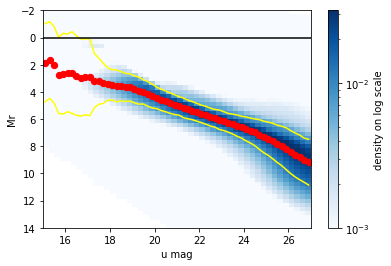

In [141]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['Mr'], 15.0, 27.0, 48, 14.0, -2.0, 52, 'u mag', 'Mr', logScale=True)

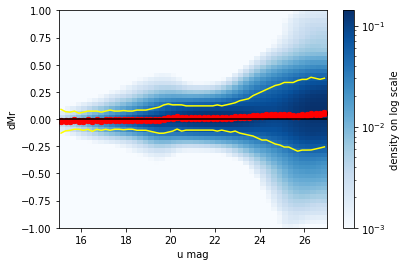

In [142]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['dMr'], 15.0, 27.0, 48, -1.0, 1.0, 52, 'u mag', 'dMr', logScale=True)

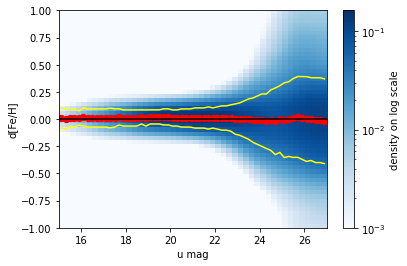

In [143]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['dFeH'], 15.0, 27.0, 48, -1.0, 1.0, 52, 'u mag', 'd[Fe/H]', logScale=True)

In [144]:
umagMax = 25.7      # 5-sigma LSST coadded depth
lt.makeStatsTable0(s2, dMrname='dMr', dFeHname='dFeH', magName='umag', magThresh=umagMax, FeHthresh=-1.0, Mr1=4.0, Mr2=8.0)

---------------------------------------------------------------------
      FULL SAMPLE:           dMr                  dFeH
             all: ['0.040', '0.21', 814450] ['-0.010', '0.24', 814450]
    mag selected: ['0.010', '0.13', 231008] ['0.010', '0.11', 231008]
---------------------------------------------------------------------
       low [FeH]:           dMr                  dFeH
             all: ['0.010', '0.13', 37416] ['0.020', '0.16', 37416]
          giants: ['-0.050', '0.14', 3502] ['0.020', '0.08', 3502]
         blue MS: ['0.020', '0.13', 32848] ['0.020', '0.16', 32848]
          red MS: ['0.520', '0.44', 1066] ['-0.730', '0.61', 1066]
      high [FeH]:           dMr                  dFeH
             all: ['0.010', '0.13', 193592] ['0.010', '0.10', 193592]
          giants: ['-0.020', '0.07', 27724] ['0.020', '0.05', 27724]
         blue MS: ['0.020', '0.13', 141193] ['0.010', '0.10', 141193]
          red MS: ['0.110', '0.21', 24675] ['-0.080', '0.22', 24675]
--------

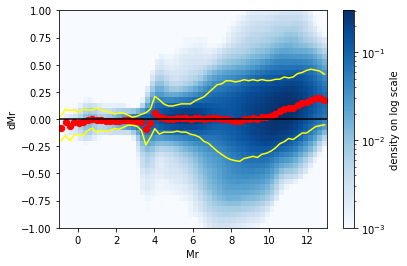

In [146]:
(xBin, medianBin) = pt.plot2Dmap(s2['Mr'], s2['dMr'], -1.0, 13.0, 56, -1.0, 1.0, 40, 'Mr', 'dMr', logScale=True)

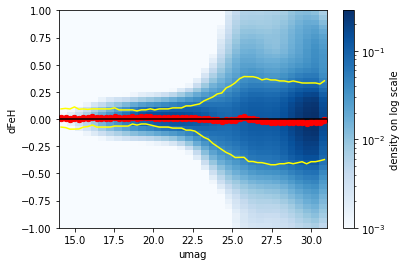

In [147]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['dFeH'], 14.0, 31.0, 34, -1.0, 1.0, 45, 'umag', 'dFeH', logScale=True)

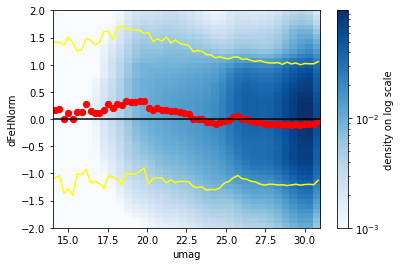

In [148]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['dFeHNorm'], 14.0, 31.0, 34, -2.0, 2.0, 45, 'umag', 'dFeHNorm', logScale=True)

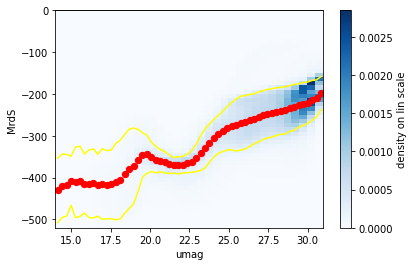

In [172]:
(xBin, medianBin) = pt.plot2Dmap(s2['umag'], s2['MrdS'], 14.0, 31.0, 34, -520.0, 0.0, 52, 'umag', 'MrdS', logScale=False)

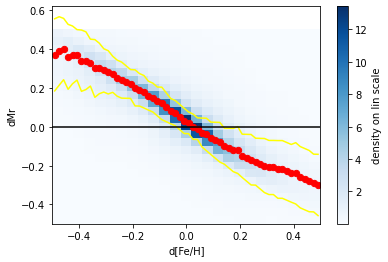

In [173]:
(xBin, medianBin) = pt.plot2Dmap(s2['dFeH'], s2['dMr'], -0.5, 0.5, 25, -0.5, 0.5, 25, 'd[Fe/H]', 'dMr', logScale=False)

## Karlo's NN performance

READING FROM ../data/TRILEGAL_three_pix_triout_RealErrors2.txt
555548 read from ../data/TRILEGAL_three_pix_triout_RealErrors2.txt
READING FROM ../data/KarloNN/TRILEGAL_three_pix_triout_RealErrors2_SimpleSingle.txt
assuming truncated format from Sep 23
555548 read from ../data/KarloNN/TRILEGAL_three_pix_triout_RealErrors2_SimpleSingle.txt
83090
calling qpB Mr
plots for dMr
made plot: ../plots/qpB_Mr.png


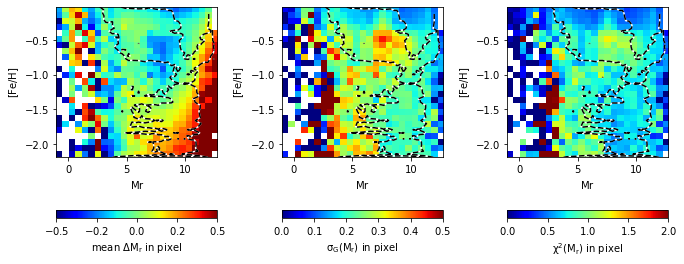

calling qpB FeH
plots for dFeH
made plot: ../plots/qpB_FeH.png


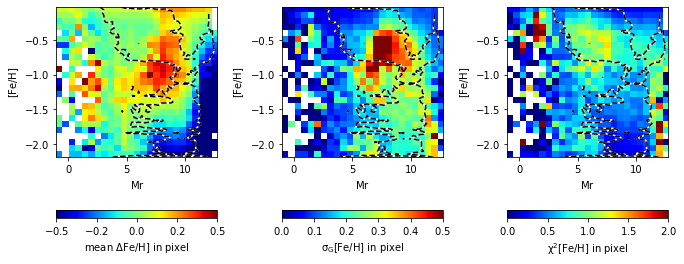

In [151]:
## final test for Karlo's NN, with uErr generated from "observed" mags 
#f1 = '../data/simCatalog_three_pix_triout_v1.txt'
#f2 = '../data/simCatalog_three_pix_triout_v1_SimpleSingle.txt'
f1 = '../data/TRILEGAL_three_pix_triout_RealErrors2.txt'
f2 = '../data/KarloNN/TRILEGAL_three_pix_triout_RealErrors2_SimpleSingle.txt'
simsF, simsTestF = bt.cK(f1,f2, sim3=True, simtype='a') 